In [487]:
import pandas as pd
import sklearn
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [488]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [489]:
train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [490]:
print(df.groupby(['HomePlanet', 'CryoSleep'])['Destination'].value_counts())

KeyError: 'HomePlanet'

## Decks B, C, E had almost double Transportations while F had 1.27 times

In [ ]:
train.groupby(['Transported', 'Deck'])['CryoSleep'].value_counts()

In [760]:
df = train.append(test).reset_index()

## Binning Age
Categorized the users into age groups

# Try changing bins

In [761]:
def age_group(df):
    age_group = pd.cut(x=df.Age.astype(float),
                      bins=[-1, 12, 18, 25, 30, 50, 1.e+10],
                      labels=['Age_0-12', 'Age_13-17', 'Age_18-25', 'Age_26-30', 'Age_31-50', 'Age_51+'])
    
    df.insert(df.shape[1],'Age_Group', age_group)
    return df

## Expenses

`Total Expenses`: We take all expenses and of a user and add it, and add another column    `No expenses` which is a check if user has spent any money

In [762]:
expense_features = ["RoomService", "FoodCourt", "ShoppingMall", 'Spa', "VRDeck"]
def expense(df):
    df['Total_expense'] = df.loc[:,expense_features].sum(axis=1)
    df['No_expenses'] = (df['Total_expense']==0).astype(int)
    return df

## Group and Member Details


In [763]:
def group_details(df):
    split = df.PassengerId.str.split('_')
    group = [w[0] for w in split]
    memberNum = [w[1] for w in split]
    df['Group'] = group
    df['MemberNum'] = memberNum
    return df

## Room Details

In [764]:
def cabin_details(df):
    split = df.Cabin.str.split("/", expand=True)
    deck = split.iloc[:, 0]
    num = split.iloc[:, 1]
    side = split.iloc[:, 2]
    side_encoded = []
    for i in side:
        if i == 'P' and type(i) == str:
            side_encoded.append(1)
        else:
            if type(i) == str:
                side_encoded.append(0)
            else:
                side_encoded.append(float('nan'))
    
    df['Deck'] = deck
    df['Num'] = num
    df['Side'] = side_encoded
    
    return df

## Cabin Region

In [765]:
def cabin_region(df):
    cabin_group = pd.cut(x=df.Num.astype('float'),
                      bins=[-10, 300, 600, 900, 1200, 1500, 1800, 1.e+10],
                      labels=['r1', 'r2', 'r3', 'r4', 'r5', 'r6', 'r7'])
    if 'Cabin_Region' in df.columns:
        df = df.drop('Cabin_Region', axis=1)
        df.insert(df.shape[1],'Cabin_Region', cabin_group)
    else:
        df.insert(df.shape[1],'Cabin_Region', cabin_group)
    return df

In [766]:
def prerpocess_df(df):
    df = expense(df)
    df = group_details(df)
    df = cabin_details(df)
    df = cabin_region(df)
    return df

In [767]:
df = prerpocess_df(df)

In [768]:
df

,index,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,...,Name,Transported,Total_expense,No_expenses,Group,MemberNum,Deck,Num,Side,Cabin_Region
0,0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,...,Maham Ofracculy,False,0.0,1,0001,01,B,0,1.0,r1
1,1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,...,Juanna Vines,True,736.0,0,0002,01,F,0,0.0,r1
2,2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,...,Altark Susent,False,10383.0,0,0003,01,A,0,0.0,r1
3,3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,...,Solam Susent,False,5176.0,0,0003,02,A,0,0.0,r1
4,4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,...,Willy Santantines,True,1091.0,0,0004,01,F,1,0.0,r1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,...,Jeron Peter,NaN,0.0,1,9266,02,G,1496,0.0,r5
12966,4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,...,Matty Scheron,NaN,1018.0,0,9269,01,NaN,NaN,NaN,NaN
12967,4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,...,Jayrin Pore,NaN,0.0,1,9271,01,D,296,1.0,r1
12968,4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,...,Kitakan Conale,NaN,3203.0,0,9273,01,D,297,1.0,r1


# Filling NA Values

In [833]:
def checkNull(df):
    sns.heatmap(df.isna())
    print(df.isna().sum())

index                     0
PassengerId               0
HomePlanet               94
CryoSleep                 0
Cabin                   299
Destination             274
Age                     270
VIP                       0
RoomService             263
FoodCourt               289
ShoppingMall            306
Spa                     284
VRDeck                  268
Name                    294
Transported            4277
Total_expense             0
No_expenses               0
Group                     0
MemberNum                 0
Deck                    299
Num                     299
Side                    299
Cabin_Region            299
roomServiceExpense      170
foodCourtExpense        179
SpaExpense              173
shoppingMallExpense     172
Solo                      0
dtype: int64


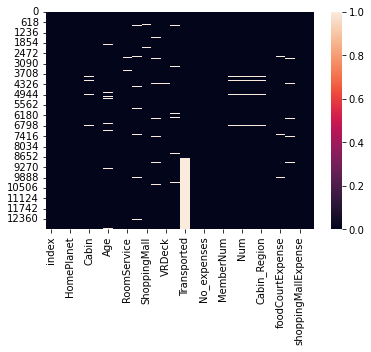

In [834]:
checkNull(df)

In [771]:
df.HomePlanet.isnull().sum()

288

#### The People from the same group will belong to the same HomePlanet, so we fill their values accordingly

In [772]:
def null_HomePlanet_Group(df):
    #get which group is from which planet
    group_homePlanet_map = {}
    for index, data in df.iterrows():
        if type(data.HomePlanet) == str:
            group_homePlanet_map[data.Group] = data.HomePlanet

    #fill na Groups with HomePlanet
    for index, data in df.iterrows():
        if type(data.HomePlanet) == float and data.Group in group_homePlanet_map:
            df.at[index, 'HomePlanet'] = group_homePlanet_map[data.Group]
    return df

In [773]:
df = null_HomePlanet_Group(df)

In [774]:
df.HomePlanet.isnull().sum()

157

In [775]:
df.groupby(['Deck'])['HomePlanet'].value_counts()

Deck  HomePlanet
A     Europa         352
B     Europa        1137
C     Europa        1096
D     Mars           410
      Europa         301
E     Earth          589
      Mars           515
      Europa         199
F     Earth         2437
      Mars          1742
G     Earth         3731
T     Europa          10
Name: HomePlanet, dtype: int64

`A, B, C, T` -> Europa and `G` -> Earth

In [776]:
def deck_HomePlanet(df):
    df.loc[(df['HomePlanet'].isna()) & (df['Deck'].isin(['A', 'B', 'C', 'T'])), 'HomePlanet'] = 'Europa'
    df.loc[(df['HomePlanet'].isna()) & (df['Deck']=='G'), 'HomePlanet'] = 'Earth'
    return df

In [777]:
df = deck_HomePlanet(df)

In [778]:
df.HomePlanet.isnull().sum()

94

In [779]:
df.groupby(['CryoSleep'])['No_expenses'].value_counts()

CryoSleep  No_expenses
False      0              7339
           1               740
True       1              4581
Name: No_expenses, dtype: int64

#### All people in CryoSleep dont spend any money, while as majority of awake people do

In [780]:
def CryoSleep_Expenses(df):
    df.loc[(df['CryoSleep'].isna()) & (df['No_expenses'] == 0), 'CryoSleep'] = False
    df.loc[(df['CryoSleep'].isna()) & (df['No_expenses'] == 1), 'CryoSleep'] = True
    return df

In [781]:
df = CryoSleep_Expenses(df)
df.CryoSleep.isna().sum()

0

In [782]:
import math
spaExpense = []
for w in df.Spa:
    if w > 0 and math.isnan(w) == False:
        spaExpense.append(1)
    else:
        if math.isnan(w) == False:
            spaExpense.append(0)
        else:
            spaExpense.append(float('nan'))
roomServiceExpense = []
for w in df.RoomService:
    if w > 0 and math.isnan(w) == False:
        roomServiceExpense.append(1)
    else:
        if math.isnan(w) == False:
            roomServiceExpense.append(0)
        else:
            roomServiceExpense.append(float('nan'))
foodCourtExpense = []
for w in df.FoodCourt:
    if w > 0 and math.isnan(w) == False:
        foodCourtExpense.append(1)
    else:
        if math.isnan(w) == False:
            foodCourtExpense.append(0)
        else:
            foodCourtExpense.append(float('nan'))
shoppingMallExpense = []
for w in df.ShoppingMall:
    if w > 0 and math.isnan(w) == False:
        shoppingMallExpense.append(1)
    else:
        if math.isnan(w) == False:
            shoppingMallExpense.append(0)
        else:
            shoppingMallExpense.append(float('nan'))
df['roomServiceExpense'] = roomServiceExpense
df['foodCourtExpense'] = foodCourtExpense
df['SpaExpense'] = spaExpense
df['shoppingMallExpense'] = shoppingMallExpense

In [783]:
df.VIP.value_counts()

False    12401
True       273
Name: VIP, dtype: int64

In [784]:
df.RoomService.sort_values(ascending=False).head(273)

4416     14327.0
9930     11567.0
5105      9920.0
8626      8586.0
7933      8243.0
          ...   
2683      2127.0
5057      2116.0
7051      2110.0
11260     2109.0
121       2103.0
Name: RoomService, Length: 273, dtype: float64

In [785]:
print(df.FoodCourt.isna().sum() , df.foodCourtExpense.isna().sum())
print(df.ShoppingMall.isna().sum() , df.shoppingMallExpense.isna().sum())
print(df.RoomService.isna().sum() , df.roomServiceExpense.isna().sum())
print(df.Spa.isna().sum() , df.SpaExpense.isna().sum())

289 289
306 306
263 263
284 284


In [786]:
df[(df.foodCourtExpense == 1.0) & (df.CryoSleep == False) & (df.VIP.isna())].head(60)

,index,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,...,Group,MemberNum,Deck,Num,Side,Cabin_Region,roomServiceExpense,foodCourtExpense,SpaExpense,shoppingMallExpense
38,38,0036_01,Earth,False,F/8/S,55 Cancri e,15.0,NaN,0.0,492.0,...,0036,01,F,8,0.0,r1,0.0,1.0,1.0,1.0
566,566,0593_01,Mars,False,D/24/P,TRAPPIST-1e,NaN,NaN,43.0,152.0,...,0593,01,D,24,1.0,r1,1.0,1.0,1.0,1.0
582,582,0607_01,Europa,False,C/22/P,TRAPPIST-1e,37.0,NaN,27.0,654.0,...,0607,01,C,22,1.0,r1,1.0,1.0,1.0,1.0
646,646,0679_01,Earth,False,G/104/S,TRAPPIST-1e,20.0,NaN,NaN,215.0,...,0679,01,G,104,0.0,r1,NaN,1.0,1.0,0.0
832,832,0889_02,Europa,False,C/32/P,55 Cancri e,27.0,NaN,1.0,12804.0,...,0889,02,C,32,1.0,r1,1.0,1.0,1.0,0.0
850,850,0913_01,Europa,False,E/51/P,55 Cancri e,38.0,NaN,0.0,172.0,...,0913,01,E,51,1.0,r1,0.0,1.0,1.0,0.0
954,954,1015_01,Earth,False,F/189/S,TRAPPIST-1e,44.0,NaN,0.0,131.0,...,1015,01,F,189,0.0,r1,0.0,1.0,1.0,1.0
959,959,1022_01,Earth,False,NaN,TRAPPIST-1e,15.0,NaN,48.0,6.0,...,1022,01,NaN,NaN,NaN,NaN,1.0,1.0,1.0,0.0
1028,1028,1094_01,Earth,False,F/224/P,TRAPPIST-1e,60.0,NaN,437.0,2.0,...,1094,01,F,224,1.0,r1,1.0,1.0,0.0,0.0
1052,1052,1121_01,Earth,False,F/229/P,PSO J318.5-22,55.0,NaN,98.0,46.0,...,1121,01,F,229,1.0,r1,1.0,1.0,1.0,0.0


# 1. Majority of VIPs in (df.foodCourtExpense == 0.0) & (df.CryoSleep == True) & (df.VIP == True) are in No_expenses == 1
# 2. Other VIPs are (df.foodCourtExpense == 1.0) & (df.CryoSleep == False) df.HomePlanet is either Earth or Europa 

In [787]:
df.groupby(['foodCourtExpense','CryoSleep'],)['VIP'].value_counts()

foodCourtExpense  CryoSleep  VIP  
0.0               False      False    3402
                             True       68
                  True       False    4473
                             True       27
1.0               False      False    4248
                             True      172
Name: VIP, dtype: int64

In [788]:
df.groupby(['foodCourtExpense','CryoSleep'])['VIP'].value_counts()

foodCourtExpense  CryoSleep  VIP  
0.0               False      False    3402
                             True       68
                  True       False    4473
                             True       27
1.0               False      False    4248
                             True      172
Name: VIP, dtype: int64

In [789]:
df.groupby(['HomePlanet'])['VIP'].value_counts()

HomePlanet  VIP  
Earth       False    6804
Europa      False    2937
            True      178
Mars        False    2572
            True       91
Name: VIP, dtype: int64

In [790]:
df.VIP.isna().sum()

296

In [807]:
def fillVips(df):
    df.loc[(df.foodCourtExpense == 0.0) & (df.CryoSleep == True) & (df.VIP.isna()) & df.No_expenses == 1, 'VIP'] = True
    df.loc[(df.foodCourtExpense == 0.0) & (df.CryoSleep == True) & (df.HomePlanet == 'Mars') & (df.VIP.isna()), 'VIP'] = True
    df.loc[(df.foodCourtExpense == 0.0) & (df.CryoSleep == True) & (df.HomePlanet == 'Europa') & (df.VIP.isna()), 'VIP'] = True
    df.loc[(df.VIP.isna()), 'VIP'] = False
    return df

df = fillVips(df)

In [808]:
df.VIP.isna().sum()

0

In [809]:
df.VIP.value_counts()

False    12590
True       380
Name: VIP, dtype: int64

# People in cryosleep can't spend money

In [819]:
def expensesNan(df):
    df.loc[(df.foodCourtExpense.isna()) & (df.CryoSleep == True), 'foodCourtExpense'] = 0.0
    df.loc[(df.shoppingMallExpense.isna()) & (df.CryoSleep == True), 'shoppingMallExpense'] = 0.0
    df.loc[(df.SpaExpense.isna()) & (df.CryoSleep == True), 'SpaExpense'] = 0.0
    df.loc[(df.roomServiceExpense.isna()) & (df.CryoSleep == True), 'roomServiceExpense'] = 0.0
    return df
df = expensesNan(df)

In [842]:
from nltk import FreqDist

def soloTravel(df):
    freq_dist = FreqDist(df.Group)
    freq_dist
    solo = []
    for i in df.Group:
        if freq_dist[i] > 1:
            solo.append(0)
        else:
            solo.append(1)
    df['Solo'] = solo
    return df

df = soloTravel(df)

# Same group members may be going to same planet

In [856]:
def GroupDest(df):
    group_Dest_map = {}
    for index, data in df.iterrows():
        group_Dest_map[data.Group] = data.Destination
        
    for index, data in df.iterrows():
        if type(data.Destination) == float:
            df.at[index, 'Destination'] =  group_Dest_map[data.Group]
            #= group_homePlanet_map[data.Group]
    return df
        
df = GroupDest(df)

In [857]:
df.drop(df.col)

,index,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,...,Deck,Num,Side,Cabin_Region,roomServiceExpense,foodCourtExpense,SpaExpense,shoppingMallExpense,Solo,Destion
0,0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,...,B,0,1.0,r1,0.0,0.0,0.0,0.0,1,NaN
1,1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,...,F,0,0.0,r1,1.0,1.0,1.0,1.0,1,NaN
2,2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,...,A,0,0.0,r1,1.0,1.0,1.0,0.0,0,NaN
3,3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,...,A,0,0.0,r1,0.0,1.0,1.0,1.0,0,NaN
4,4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,...,F,1,0.0,r1,1.0,1.0,1.0,1.0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,...,G,1496,0.0,r5,0.0,0.0,0.0,0.0,0,NaN
12966,4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,...,NaN,NaN,NaN,NaN,0.0,1.0,1.0,1.0,1,NaN
12967,4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,...,D,296,1.0,r1,0.0,0.0,0.0,0.0,1,NaN
12968,4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,...,D,297,1.0,r1,0.0,1.0,0.0,0.0,1,NaN
